# Outlier Detection with PCA
Group Members:
Pawan Lal Bijukchhe, Caroline Sindland, Clemens Sundby Øxnevad, Daniel Centurion Barrionuevo, Muhammad Hilmi, Qin Xu

<div style="display: flex; align-items: flex-start; justify-content: space-between;">

  <div style="flex: 1; padding-right: 20px;">
    <h2>Contents</h2>
    <ul>
      <li>Background</li>
      <li>Introduction</li>
      <li>Outlier detection with PCA</li>
      <li>Methods
        <ul>
          <li>Workout examples</li>
        </ul>
      </li>
      <li>Conclusion</li>
    </ul>
  </div>

  <div style="flex: 1;">
    <img src="outliers_contents.png" style="max-width: 50%; height: auto; border: 1px solid #ccc;">
  </div>

</div>



# Background - PCA so far:
- PCA is a dimensionality reduction technique that captures the directions of maximum variance in data.
- It helps to identify patterns and highlight data points that don’t conform to the dominant data structure.
- It allows simplifying the complexity of sample spaces with many dimensions while preserving their information. 


# Introduction - Outliers:
- An outlier is **an observation** that is **unlike the other observations**. Outliers are data points that deviate significantly from most of the datasets.
- It is rare, or distinct, or does not fit in some way. 
- Outliers can have many causes, such as: Measurement or input error, Data corruption, or unusual events. 
- Detecting outliers is crucial in various fields of quality control, network security,



# Introduction - Why Outlier detection is important?
- **Improving Accuracy**: Removing or accurately handling outliers enhances the performance and predictability of data models
- **Data Quality** : Regular outlier detection is crucial to maintain the integrity and quality of data, which in turn affects the decision-making processes based on this data
- **Model performance**: Outliers can significantly impact the performance of statistical models, machine learning algorithms, and other analytical techniques. By identifying the handling outliers appropriately, we can improve the robustness and accuracy of these models.



# Univariate and multivariate outlier detection

**Outlier detection** is devided in to **univaiate analysis** (looking at one variable) and **multivariate analysis** (looking at multiple variables). A univariate analysis is only good enough if each of the variables in your data set is independent of each other.

To clearify we will show a **short example** regarding a group of people with given height and weight.

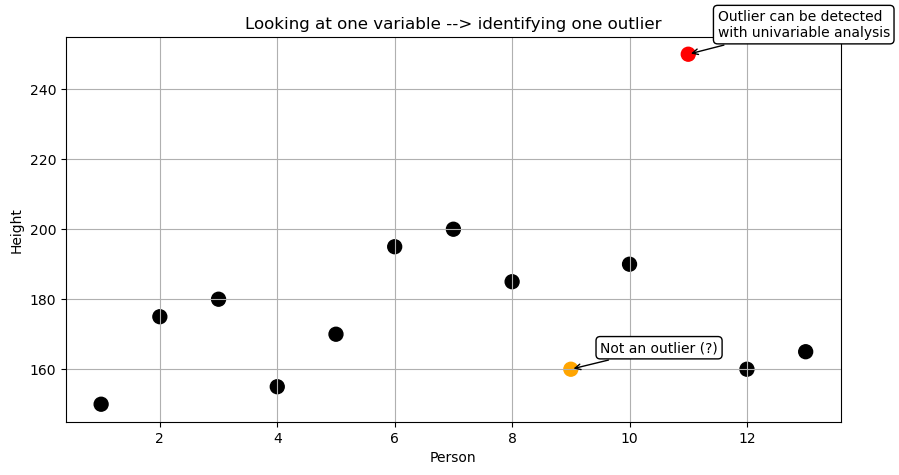

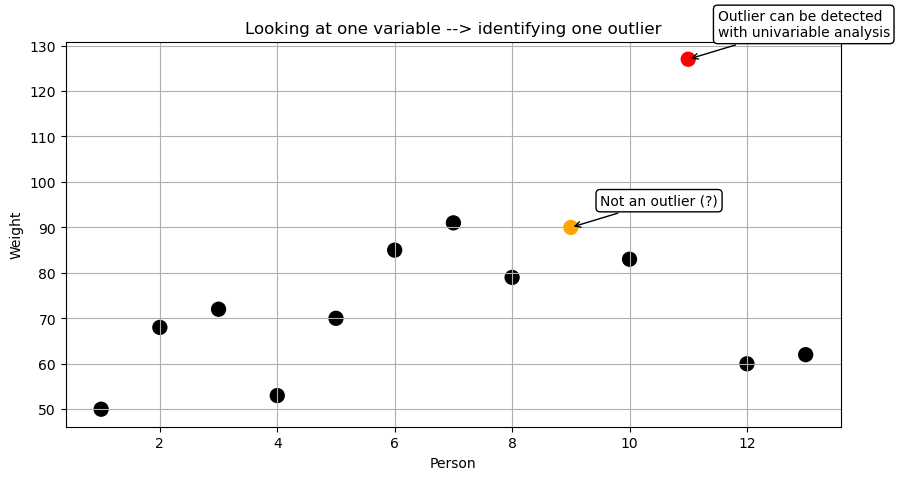

In [1]:
import matplotlib.pyplot as plt

# Define the dataset
persons = list(range(1, 14))
heights = [150, 175, 180, 155, 170, 195, 200, 185, 160, 190, 250, 160, 165]
weights = [50, 68, 72, 53, 70, 85, 91, 79, 90, 83, 127, 60, 62]
outliers = [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0]

# Define colours based on outlier status
colors = ['black' if o == 0 else 'red' if o == 1 else 'orange' for o in outliers]

# Find the index of the red and orange dots
red_index = outliers.index(1)
orange_index = outliers.index(2)

# Annotation texts
red_annotation = "Outlier can be detected\nwith univariable analysis"
orange_annotation_1 = "Not an outlier (?)"
orange_annotation_2 = "This is an outlier but it can only\nbe detected with multivariable analysis"

# Plot 1: Height vs Person
plt.figure(figsize=(10, 5))
plt.scatter(persons, heights, c=colors, s=100)
plt.title("Looking at one variable --> identifying one outlier")
plt.xlabel("Person")
plt.ylabel("Height")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(persons[red_index], heights[red_index]),
             xytext=(persons[red_index] + 0.5, heights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_1,
             xy=(persons[orange_index], heights[orange_index]),
             xytext=(persons[orange_index] + 0.5, heights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

# Plot 2: Weight vs Person
plt.figure(figsize=(10, 5))
plt.scatter(persons, weights, c=colors, s=100)
plt.title("Looking at one variable --> identifying one outlier")
plt.xlabel("Person")
plt.ylabel("Weight")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(persons[red_index], weights[red_index]),
             xytext=(persons[red_index] + 0.5, weights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_1,
             xy=(persons[orange_index], weights[orange_index]),
             xytext=(persons[orange_index] + 0.5, weights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

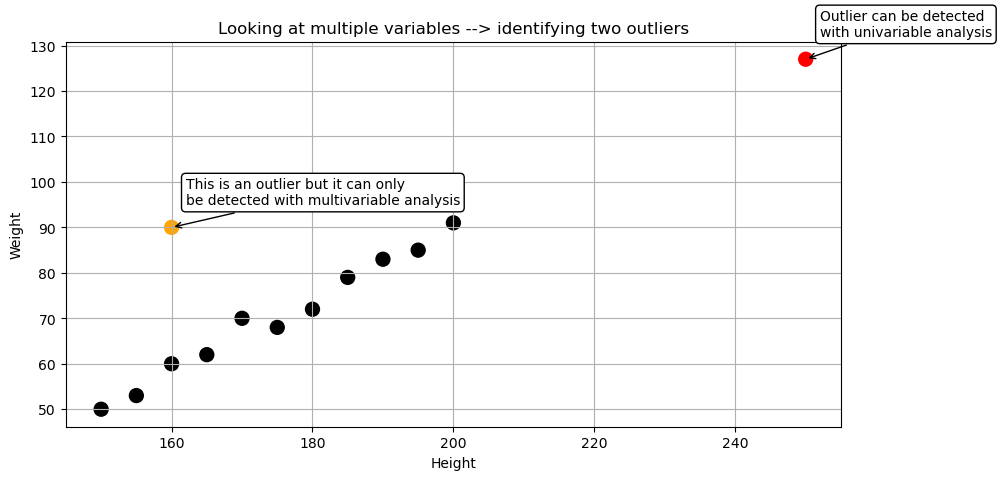

In [2]:
# Plot 3: Height vs Weight
plt.figure(figsize=(10, 5))
plt.scatter(heights, weights, c=colors, s=100)
plt.title("Looking at multiple variables --> identifying two outliers")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(heights[red_index], weights[red_index]),
             xytext=(heights[red_index] + 2, weights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_2,
             xy=(heights[orange_index], weights[orange_index]),
             xytext=(heights[orange_index] + 2, weights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

# Detecting all of the outliers require multivariable analysis, or.. PCA!
By looking at multiple variations in componation, we observe that the orange point is also an outlier. The combination of multiple vaiables are unusual.

We could detect the **red point as an outlier by univariate analysis** like "simple Z-score analysis", but the **orange point require multivariate analysis** 

**Or... an analysis on PCA transformed data!**

# Detection of outliers by the use of PCA

**Method 1:**
- **Perform PCA** to create a dateset without correlation between the components.
- **Univariate outlier detection** on the transformed data. Eg. Z-score

![Image of PCA putlier](https://towardsdatascience.com/wp-content/uploads/2024/11/1sc4quH1apgtS1gWzBaerJA.png)

**Method 2:**
- **Perform PCA** (with k components)
- Calculate the **distance between a data point and its projection** onto subspace found by PCA --> Error
- Or: **Recontruct** the data and find difference between original value and reconstructed value --> Error
- Find outliers based on **reconstruction error**. Eg.: ($(x - \hat{x})^2 < Z$)



![image](PCA_reconstruction_error.jpg)

# PCA-Based Outlier Detection

In [128]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
from scipy.io import arff

In [130]:
# Reading the glass type data
data = pd.read_csv("data/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [131]:
# Normalizing the data
X = data.copy()
X = (X-X.min(axis =0))/(X.max(axis = 0)-X.min(axis = 0))

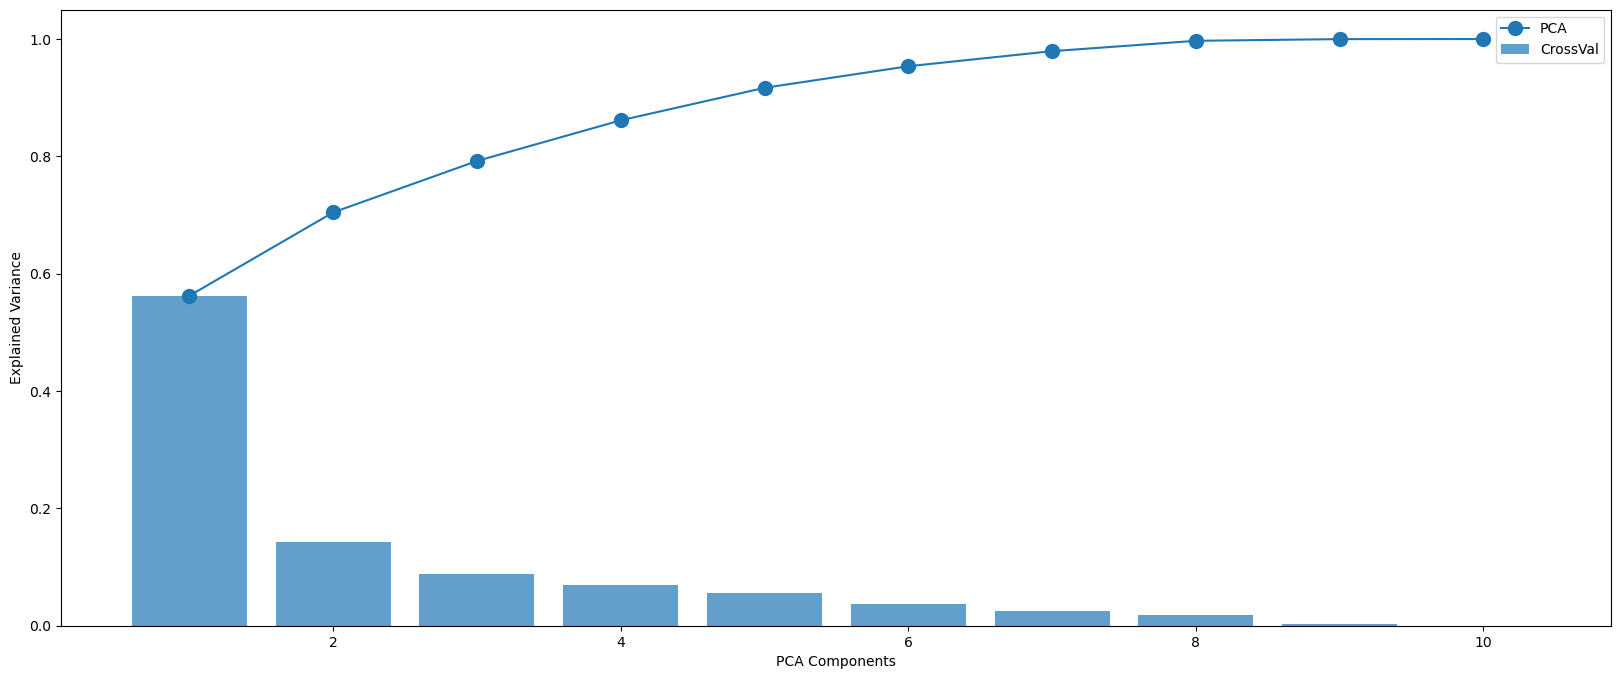

In [132]:
# Applying PCA
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
# Variance explained by each component
variance_explained = pca.explained_variance_ratio_
# Plotting the variance explained by each component


# Plotting the variance of each component and their cumulative
cum_sum = np.cumsum(pca.explained_variance_ratio_)
comp= [n for n in range(1, len(cum_sum) + 1)]
plt.figure(figsize=(20, 8))
plt.plot(comp, cum_sum, marker='o',markersize=10)
plt.bar(comp, variance_explained, alpha=0.7, align='center')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance')
plt.legend(['PCA','CrossVal'])
plt.show()

## Reconstruction Error
<div>
<img src="RE.png" width="500"/>
</div>
$$
    \textrm{RE}(x)=\frac{\sum_{i=1}^{N}(x_i-\hat{x}_i)^2}{N}
$$
where
$$
  \hat{x}_i=\sum_{i=1}^{k}z_iv_i
$$

(Reference: https://www.analyticsvidhya.com/blog/2024/04/anomaly-detection-using-pca-unveiling-insights-in-data-anomalies/)

In [133]:
# Applying PCA with specific n components
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

# Calculating reconstruction error
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.mean(np.square(X - X_reconstructed), axis=1)

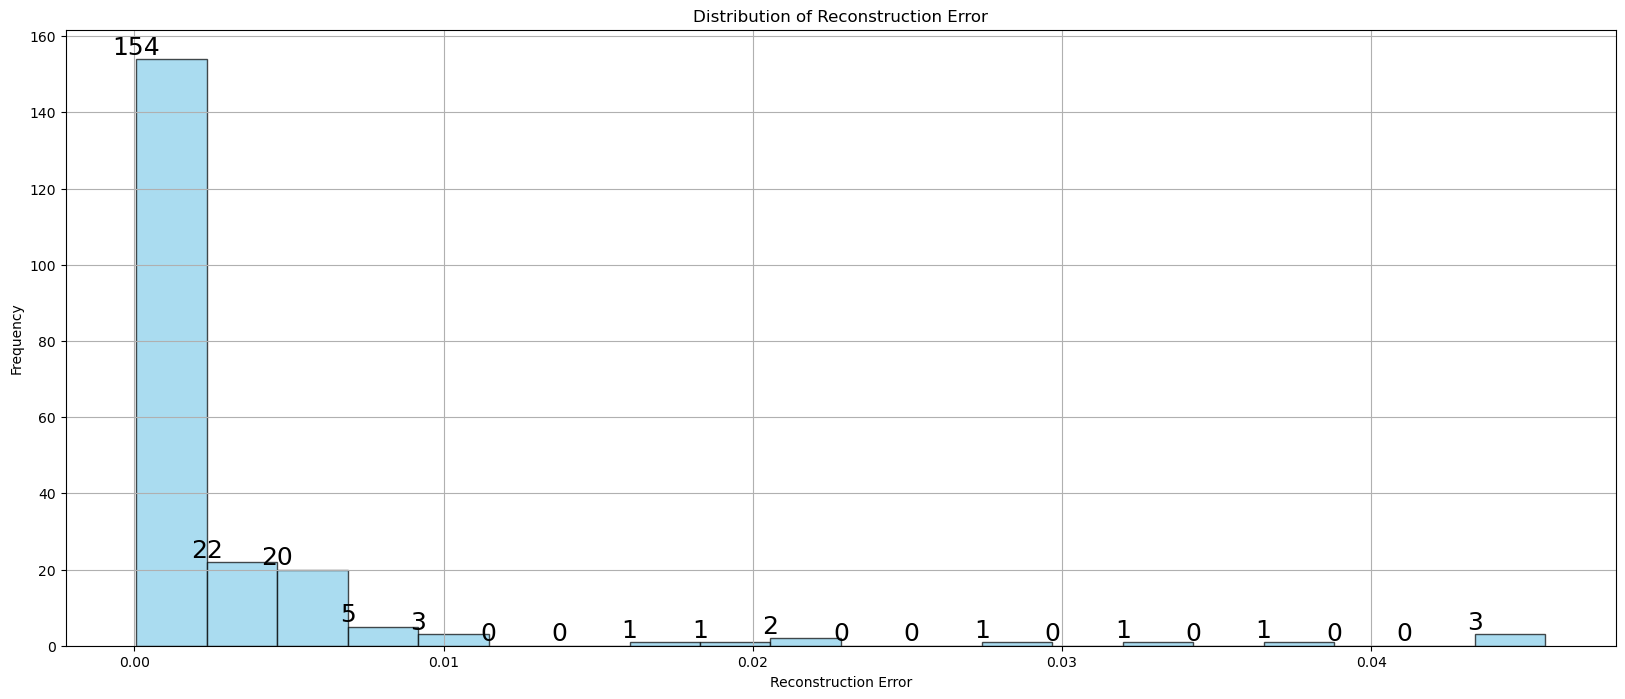

In [134]:
# Plotting distribution of the reconstruction error
plt.figure(figsize=(20, 8))
counts, bins, _ = plt.hist(reconstruction_error, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Error')
plt.grid(True)
# Annotate each bin with the count
for i in range(len(counts)):
    plt.text(bins[i], counts[i], str(int(counts[i])), ha='center', va='bottom', fontsize = 18)
plt.show()

In [135]:
# Outlier detection
threshold = np.percentile(reconstruction_error, 98)  # Adjust percentile as needed
outlier = X[reconstruction_error > threshold]
print("Number of outliers:", len(outlier))

anomalies_indices = np.where(reconstruction_error > threshold)
anomalies_indices

Number of outliers: 5


(array([106, 171, 172, 184, 207]),)

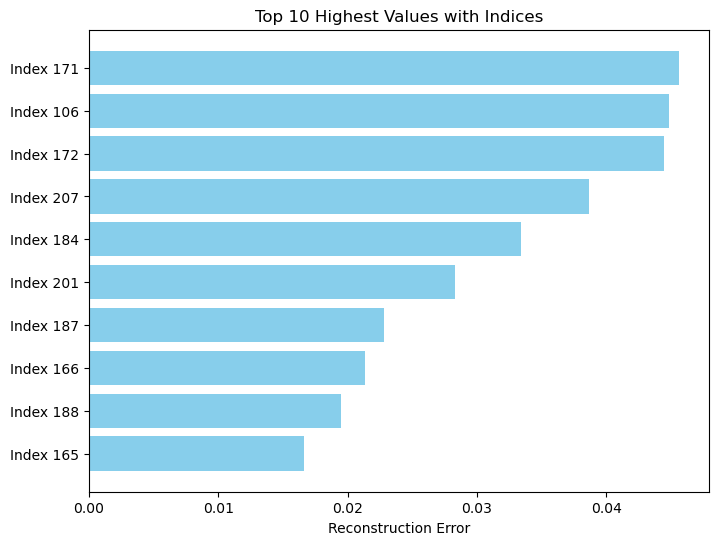

In [136]:
# Ranking the outlier score
top_indices = np.argsort(reconstruction_error)[-10:][::-1]  # sort descending
top_values = reconstruction_error[top_indices]

# plot
plt.figure(figsize=(8, 6))
plt.barh(range(10), top_values, color='skyblue')
plt.yticks(range(10), [f"Index {i}" for i in top_indices])
plt.xlabel("Reconstruction Error")
plt.title("Top 10 Highest Values with Indices")
plt.gca().invert_yaxis()  # largest on top
plt.show()

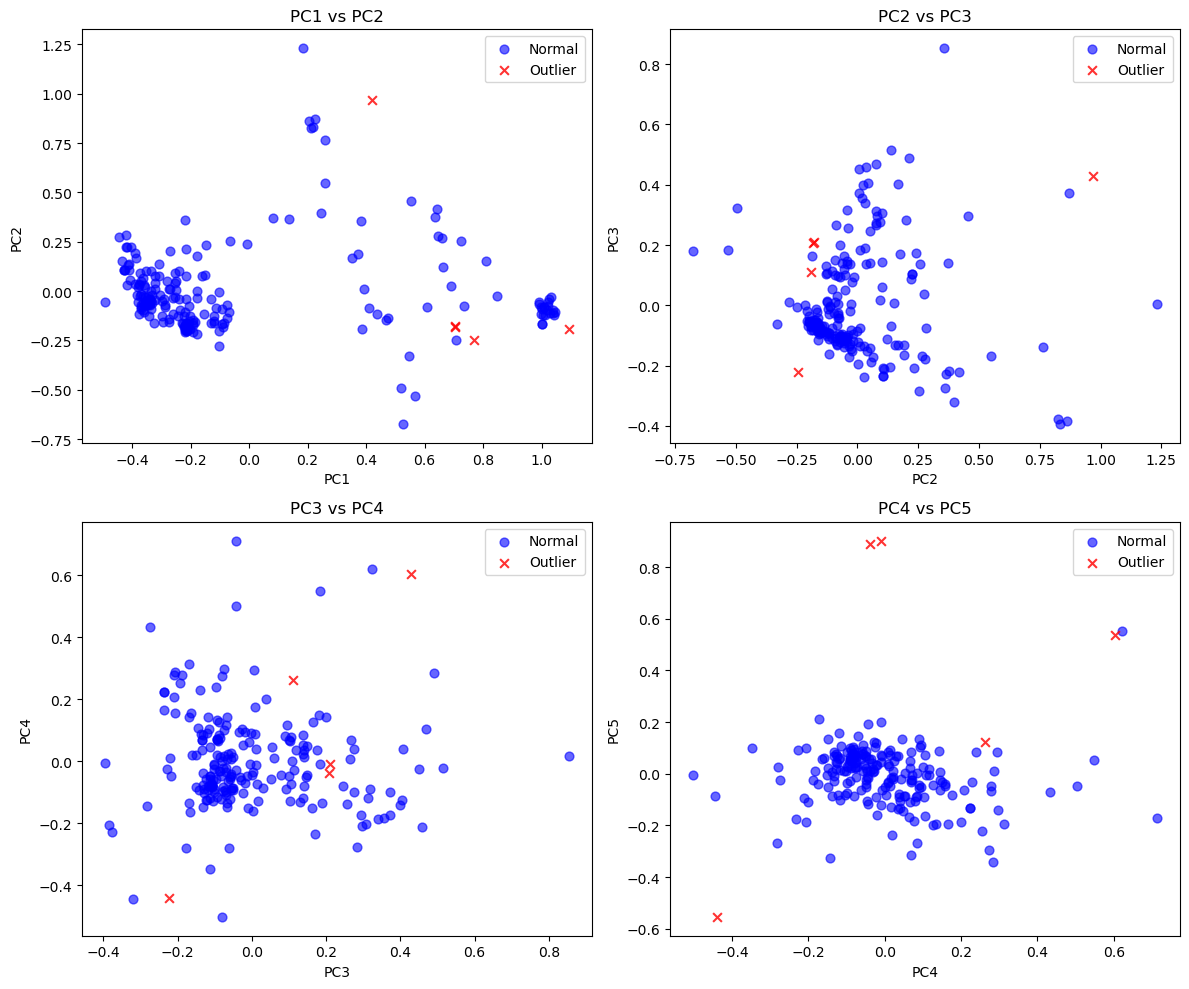

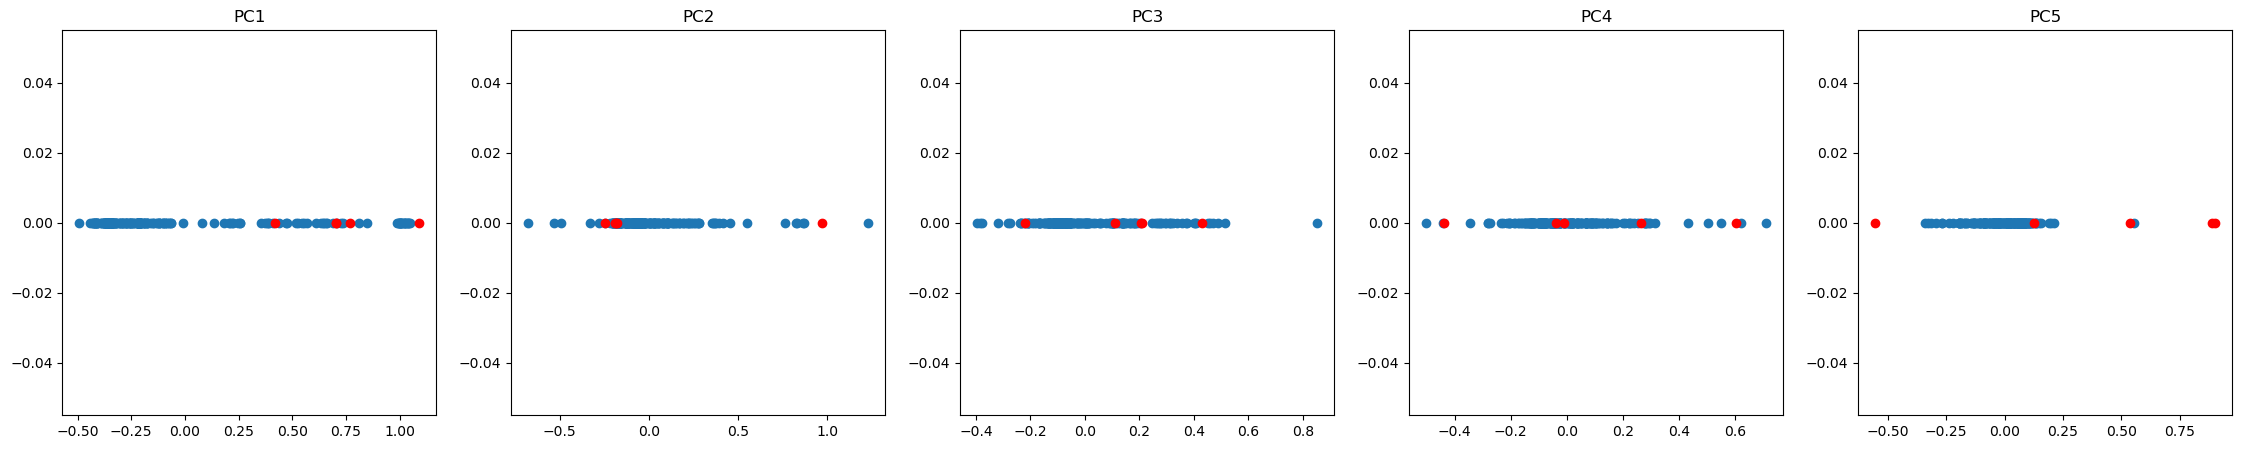

In [137]:
# Visualization of the outlier location in PC scatter plot
pairs = [(0,1), (1,2), (2,3), (3,4)]  # PC1&2, PC2&3, PC3&4, PC4&5
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (i, j) in zip(axes.flatten(), pairs):
    ax.scatter(X_pca[reconstruction_error <= threshold, i], X_pca[reconstruction_error <= threshold, j], 
               c="blue", label="Normal", alpha=0.6, s=40)
    ax.scatter(X_pca[reconstruction_error > threshold, i], X_pca[reconstruction_error > threshold, j], 
               c="red", label="Outlier", alpha=0.8, s=40, marker="x")
    ax.set_xlabel(f"PC{i+1}")
    ax.set_ylabel(f"PC{j+1}")
    ax.set_title(f"PC{i+1} vs PC{j+1}")
    ax.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (28,5))
for n in range(5):
        axes[n].scatter(X_pca[reconstruction_error <= threshold, n], 
                        np.zeros(len(X_pca[reconstruction_error <= threshold, n])))
        axes[n].scatter(X_pca[reconstruction_error > threshold, n], 
                        np.zeros(len(X_pca[reconstruction_error > threshold, n])), color = "r")
        axes[n].set_title(f"PC{n+1}")
plt.show()

## Score Distance

Score (Mahalanobis) Distance:
$$
    \textrm{SD}(x)=\sum_{i=1}^{p}\frac{z_i^2}{\lambda_i}
$$
for first $p$ components with the lowest variance.
<div>
<img src="mahalanobis.png" width="200"/>
</div>

PyOD's Weighted Score Distance:
$$
    \textrm{SD}(x)=\sum_{i=1}^{p}\frac{\|x_i-v_i\|_2}{w_i}
$$
with $w_i=\lambda_i$
<div>
<img src="pyod.png" width="200"/>
</div>

(Reference: Zhao, Y., Nasrullah, Z. and Li, Z., 2019. PyOD: A Python Toolbox for Scalable Outlier Detection. Journal of machine learning research (JMLR), 20(96), pp.1-7.)

In [138]:
# Importing PyOD's package for PCA_OD
from pyod.models.pca import PCA as PCA_OD

In [139]:
# Fits a PCA_OD detector to the data
clf = PCA_OD(n_components=5, n_selected_components=5, contamination=0.02) 
clf.fit(X)

# Predicts outlier on the full data
pred = clf.predict(X) 
pred_indices = np.where(pred > 0)
pred_indices

(array([106, 107, 171, 172, 184]),)

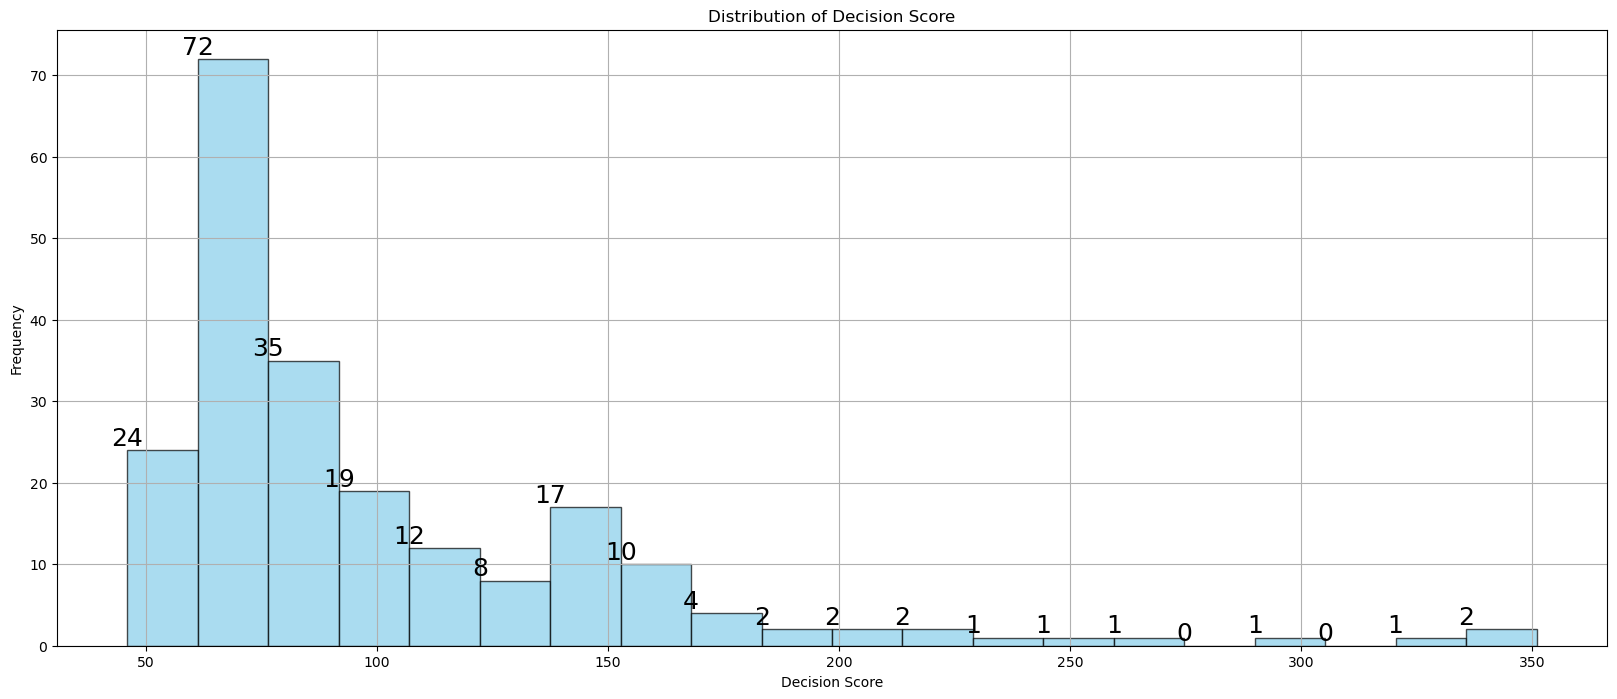

In [140]:
# Plotting distribution of the score
plt.figure(figsize=(20, 8))
counts, bins, _ = plt.hist(clf.decision_scores_, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Decision Score')
plt.ylabel('Frequency')
plt.title('Distribution of Decision Score')
plt.grid(True)
# Annotate each bin with the count
for i in range(len(counts)):
    plt.text(bins[i], counts[i], str(int(counts[i])), ha='center', va='bottom', fontsize = 18)
plt.show()

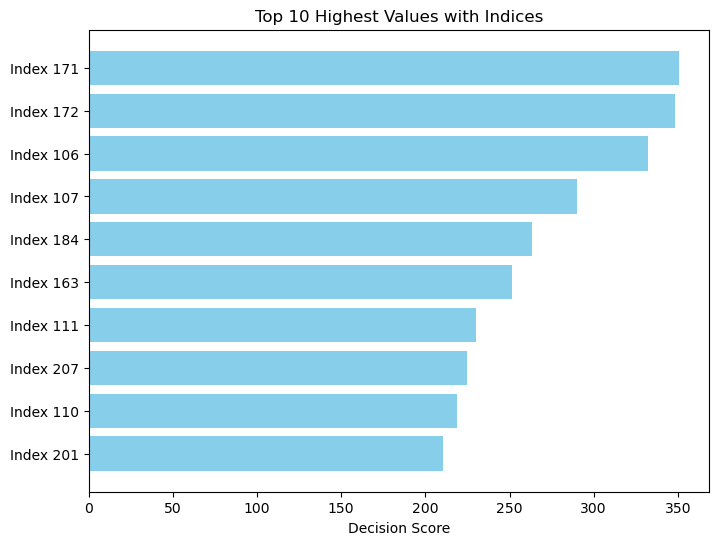

In [141]:
# Ranking the outlier score
top_indices = np.argsort(clf.decision_scores_)[-10:][::-1]  # sort descending
top_values = clf.decision_scores_[top_indices]

# plot
plt.figure(figsize=(8, 6))
plt.barh(range(10), top_values, color='skyblue')
plt.yticks(range(10), [f"Index {i}" for i in top_indices])
plt.xlabel("Decision Score")
plt.title("Top 10 Highest Values with Indices")
plt.gca().invert_yaxis()  # largest on top
plt.show()

# GLASS PCA - Univariate outlier detection

Imprting dependencies


In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

Loading the glass file from the "data folder"

In [2]:
glass_data = np.genfromtxt('data/glass.data', delimiter = ",")


In [3]:
print(f"Number \t RI \t Na \t Mg \t Al \t Si \t K \t Ca \t Ba \t Fe \t Type")

#Normalizing the data

normalized_data = (glass_data-glass_data.min(axis =0))/(glass_data.max(axis = 0)-glass_data.min(axis = 0))
print(normalized_data)

Number 	 RI 	 Na 	 Mg 	 Al 	 Si 	 K 	 Ca 	 Ba 	 Fe 	 Type
[[0.         0.43283582 0.43759398 ... 0.         0.         0.        ]
 [0.00469484 0.28358209 0.47518797 ... 0.         0.         0.        ]
 [0.00938967 0.22080773 0.42105263 ... 0.         0.         0.        ]
 ...
 [0.99061033 0.41703248 0.54586466 ... 0.52063492 0.         1.        ]
 [0.99530516 0.23529412 0.54887218 ... 0.4984127  0.         1.        ]
 [1.         0.26163301 0.52631579 ... 0.53015873 0.         1.        ]]


We have glass types, and we want to find outliers WITHIN the different class types.
That is $P(outlier|Type)$

In [4]:
class1 = normalized_data[glass_data[:,-1] == 1][:,1:-1]
class2 = normalized_data[glass_data[:,-1] == 2][:,1:-1]
class3 = normalized_data[glass_data[:,-1] == 3][:,1:-1]
#class4 = glass_data[glass_data[:,-1] == 4][:,1:-1]
class5 = normalized_data[glass_data[:,-1] == 5][:,1:-1]
class6 = normalized_data[glass_data[:,-1] == 6][:,1:-1]
class7 = normalized_data[glass_data[:,-1] == 7][:,1:-1]


class1_name = glass_data[glass_data[:,-1] == 1][:,0]
class2_name = glass_data[glass_data[:,-1] == 2][:,0]
class3_name = glass_data[glass_data[:,-1] == 3][:,0]
class5_name = glass_data[glass_data[:,-1] == 5][:,0]
class6_name = glass_data[glass_data[:,-1] == 6][:,0]
class7_name = glass_data[glass_data[:,-1] == 7][:,0]


glass_on_class_data = [class1,
                               class2,
                               class3,
                               #class4,
                               class5,
                               class6,
                               class7]


glass_name_on_glass = [class1_name,
                       class2_name,
                       class3_name,
                       class5_name,
                       class6_name,
                       class7_name]



Creating the PCA class:

In [5]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None
    
    def fit(self, X):
        # Step 1: Standardize the data (subtract the mean)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort the eigenvalues and corresponding eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Select the top n_components
        self.components = eigenvectors[:, :self.n_components]

        # Calculate explained variance
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        # Step 6: Project the data onto the selected components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def plot_explained_variance(self):
        # Create labels for each principal component
        labels = [f'PCA{i+1}' for i in range(self.n_components)]

        # Create a bar plot for explained variance
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, self.n_components + 1), self.explained_variance, alpha=0.7, align='center', color='blue', tick_label=labels)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Principal Components')
        plt.show()

Outlier detection given that we know the class of glass using Z-score detection


The z-score is calculated using the formula:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- \( x \) = raw score  
- \( \mu \) = population mean  
- \( \sigma \) = population standard deviation


________GLASS_TYPE_1_________


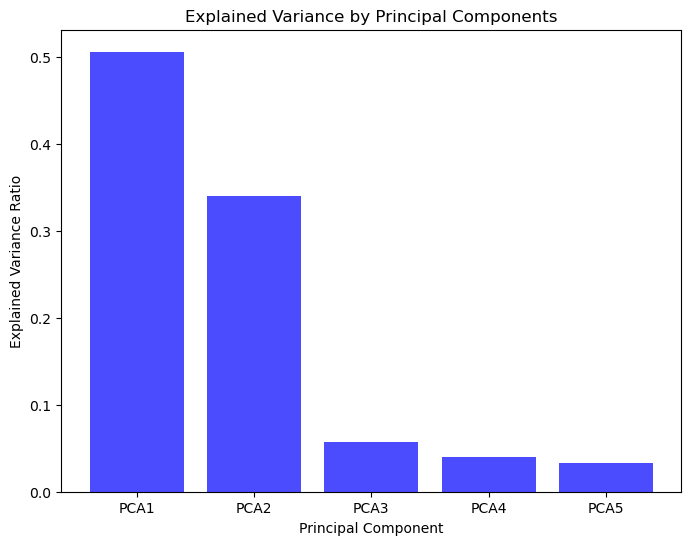

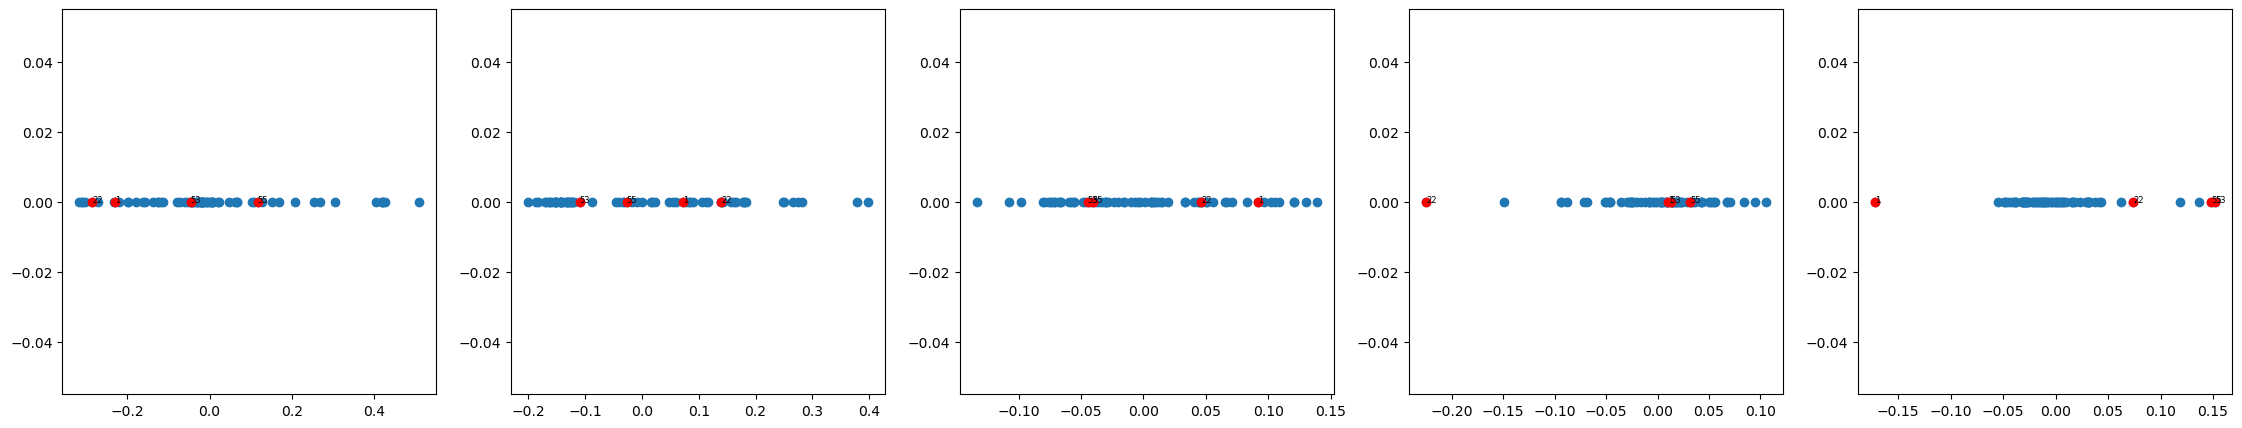

Detected outliers are [ 1. 22. 53. 55.]

________GLASS_TYPE_2_________


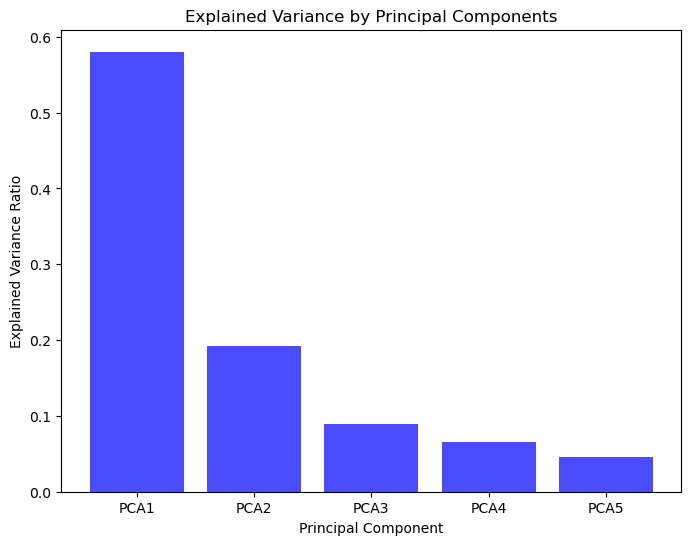

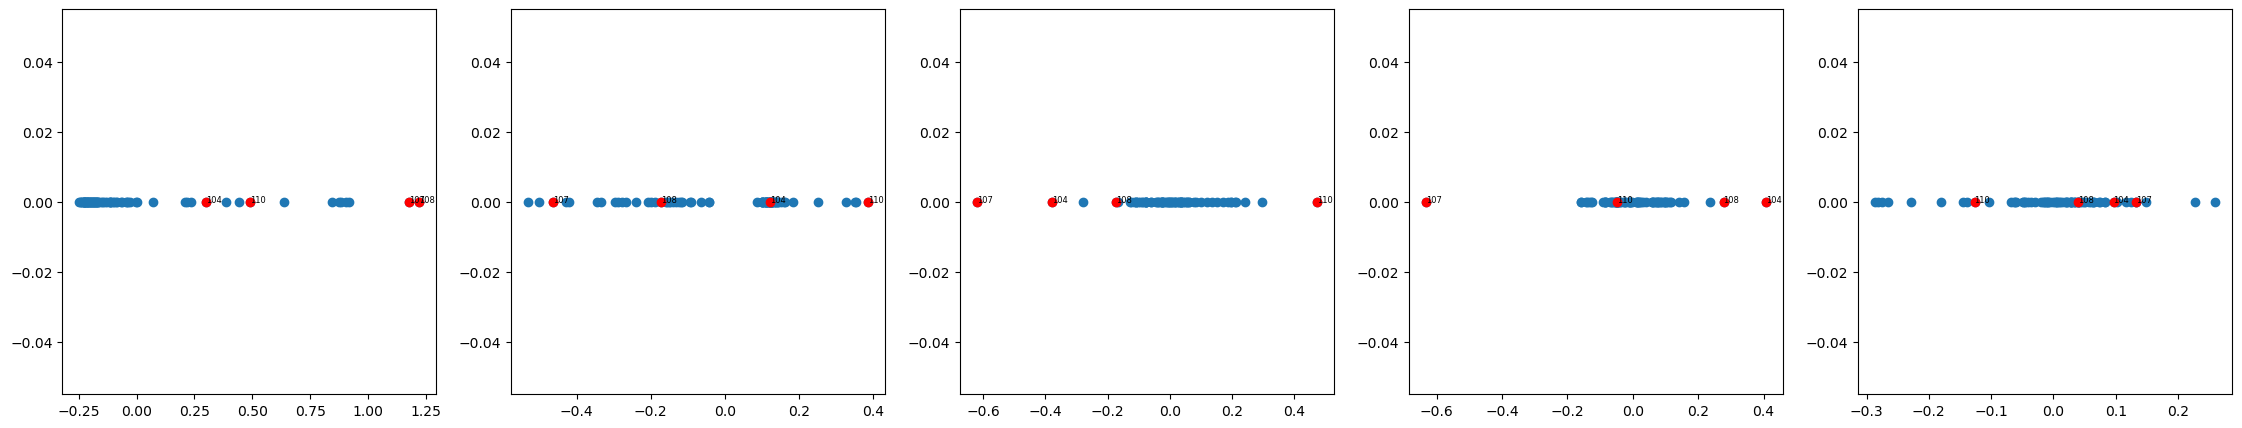

Detected outliers are [104. 107. 108. 110.]

________GLASS_TYPE_3_________


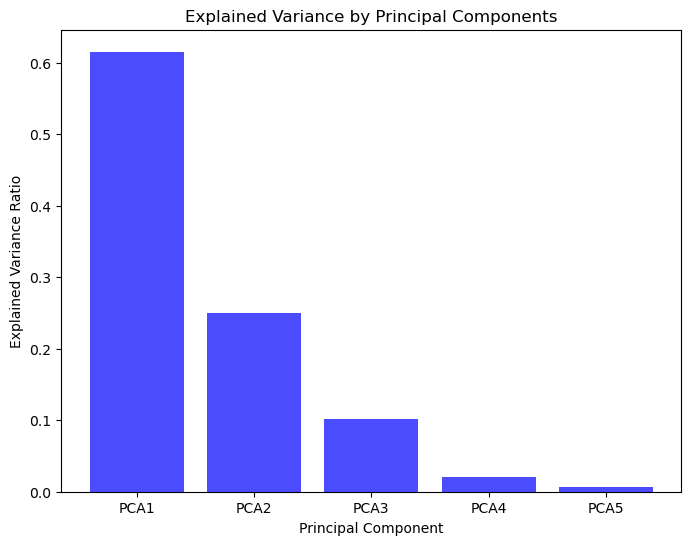

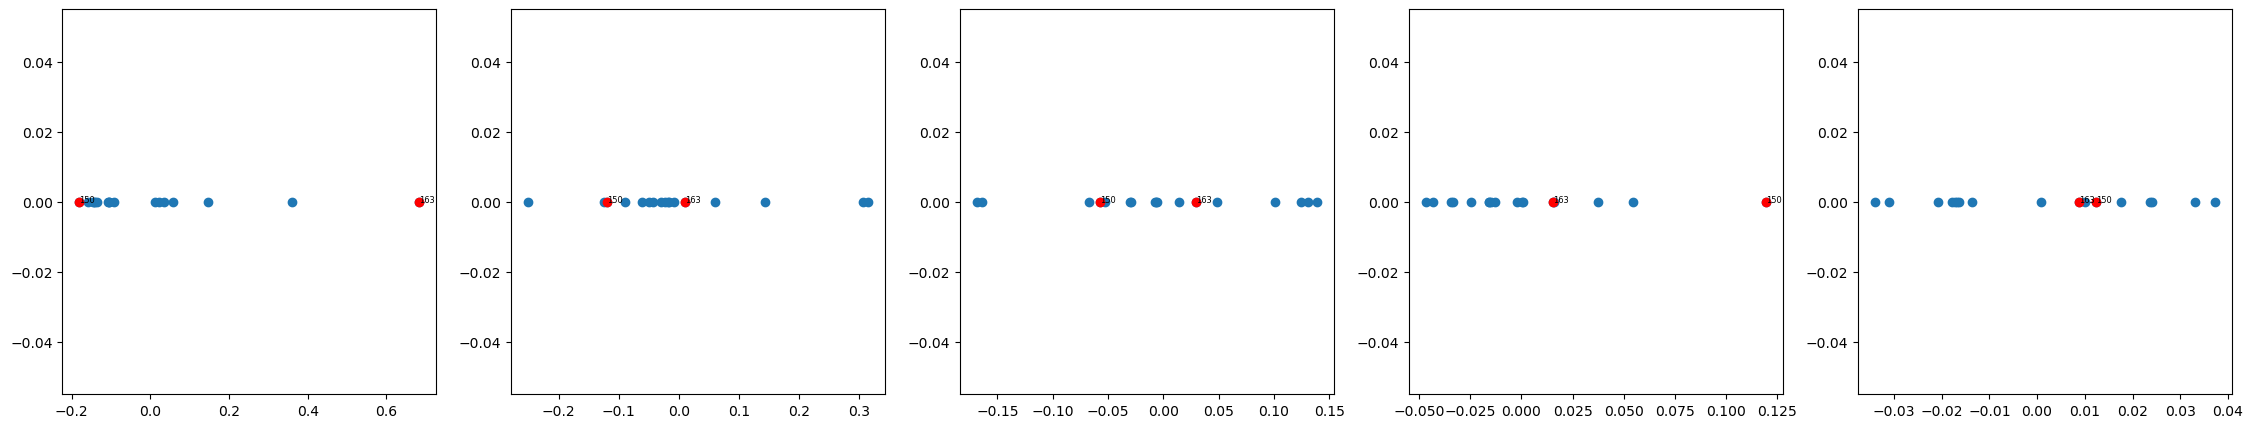

Detected outliers are [150. 163.]

________GLASS_TYPE_4_________


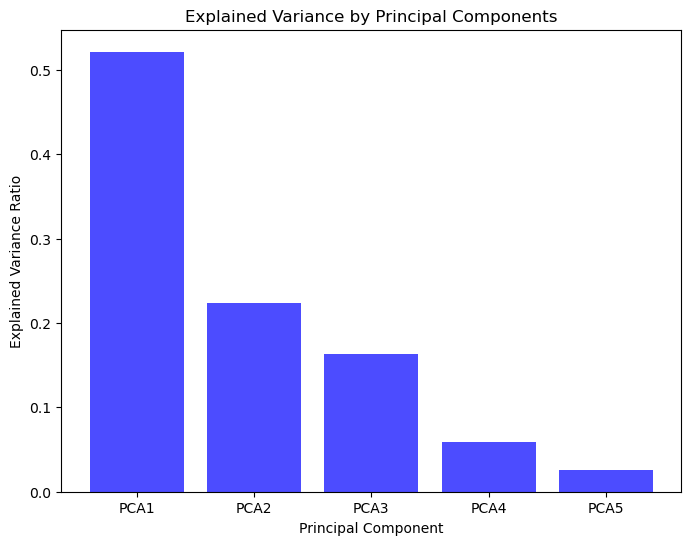

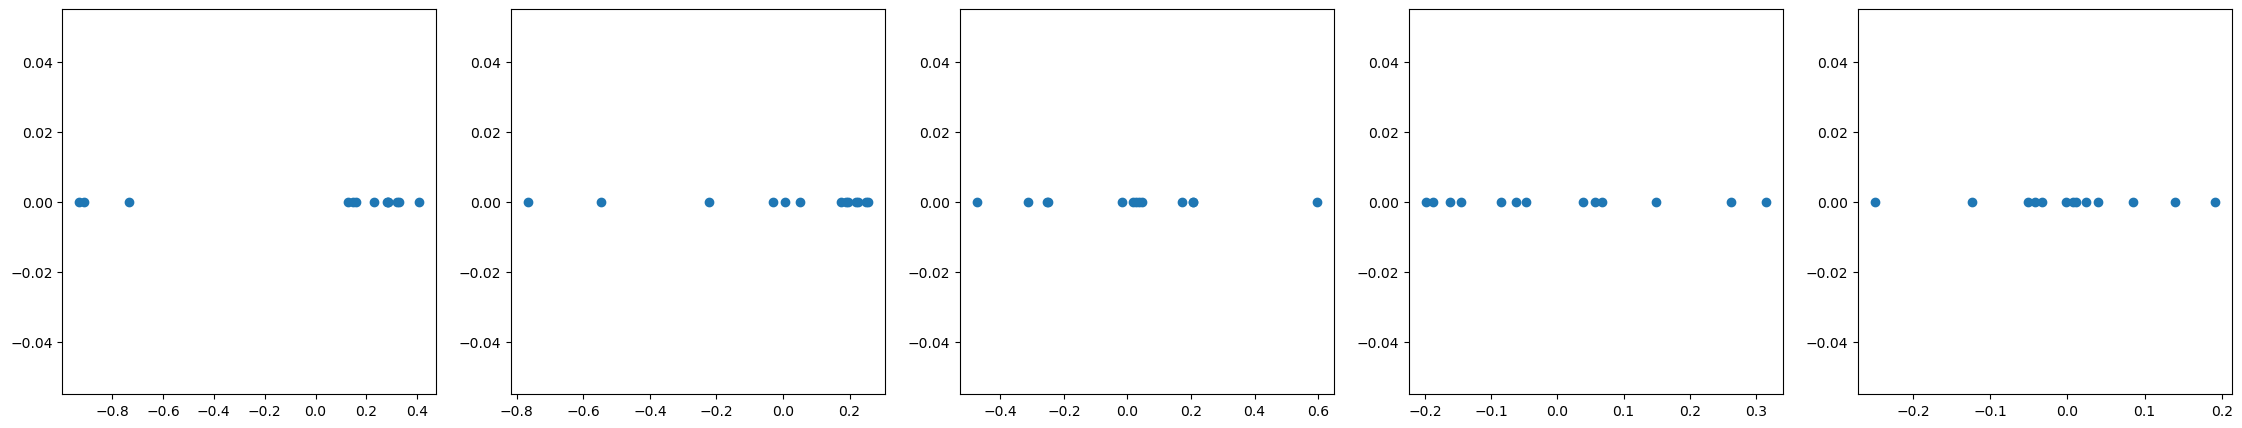

Detected outliers are []

________GLASS_TYPE_5_________


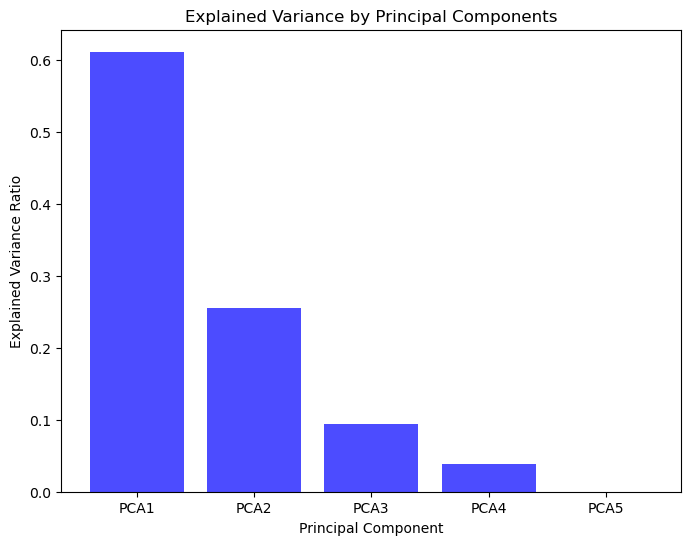

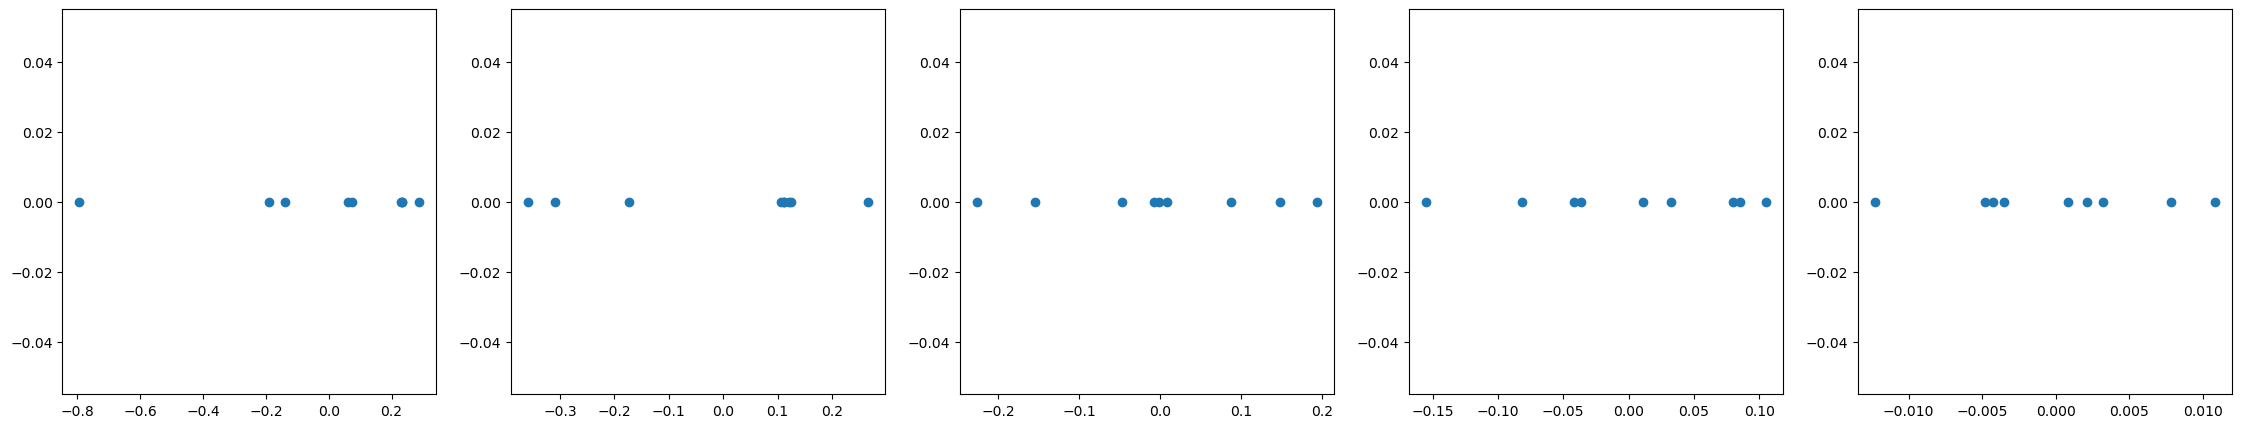

Detected outliers are []

________GLASS_TYPE_6_________


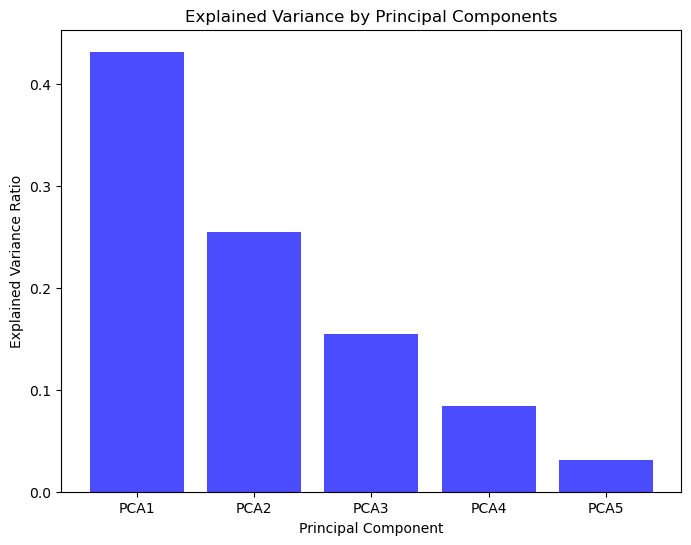

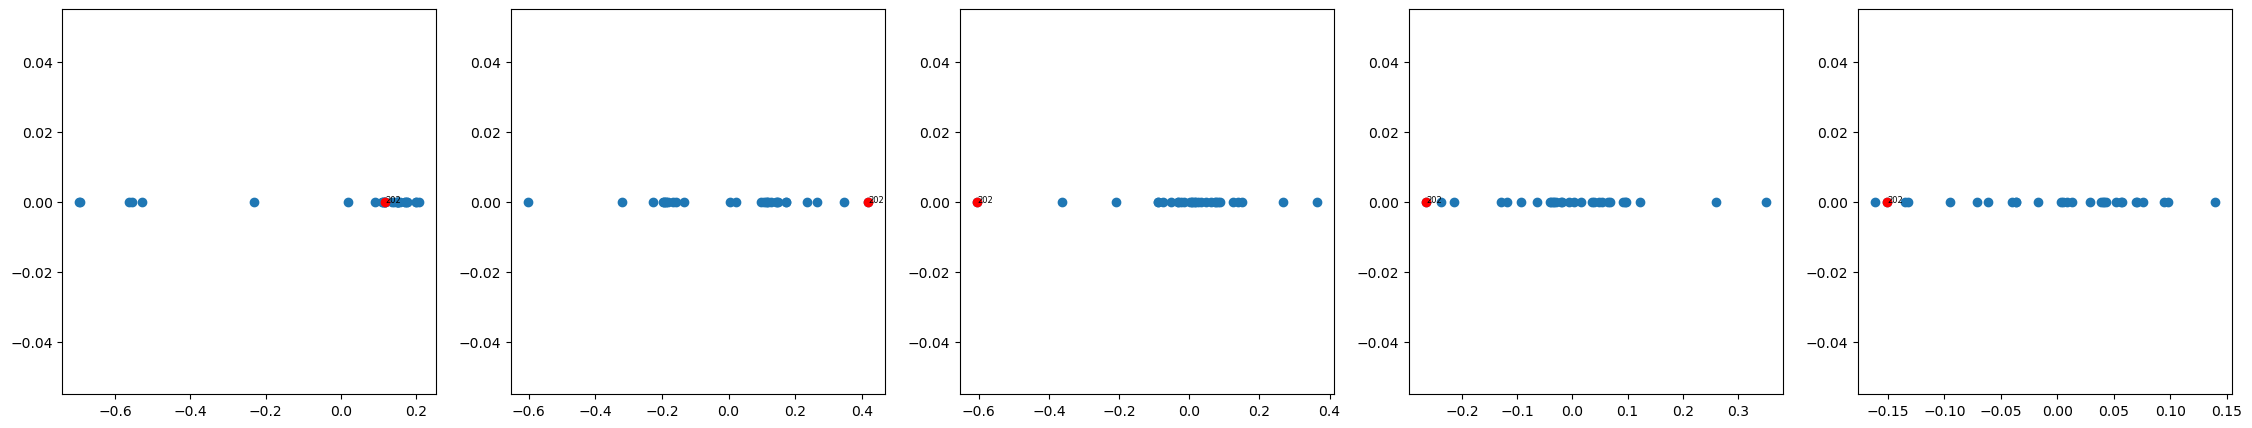

Detected outliers are [202.]


In [6]:
# Apply PCA
n_pc = 5

for idx, e in enumerate(glass_on_class_data):
    print(f"\n________GLASS_TYPE_{idx+1}_________")
    pca = PCA(n_components=n_pc)
    pca.fit(e)
    x_transformed = pca.transform(e)

    pca.plot_explained_variance()
    

    avg = np.average(x_transformed,axis = 0)
    std = np.std(x_transformed,axis = 0)

    z_score = np.absolute(((x_transformed-avg)/std))
    trueFalse = z_score >3

    outlier = np.any(trueFalse, axis = 1)
    
    
    fig, axes = plt.subplots(nrows = 1, ncols = n_pc, figsize = (28,5))
    for n in range(n_pc):
        
        axes[n].scatter(x_transformed[:,n], np.zeros(len(x_transformed[:,n])))
        axes[n].scatter(x_transformed[outlier,n], np.zeros(len(x_transformed[outlier,n])), color = "r")
        for name, cord in zip(glass_name_on_glass[idx][outlier],x_transformed[outlier,n]):
            axes[n].annotate(str(int(name)),(cord, 0), size = 6 )
        
    plt.show()

    print(f"Detected outliers are {glass_name_on_glass[idx][outlier]}")



# Outlier detection independent on class

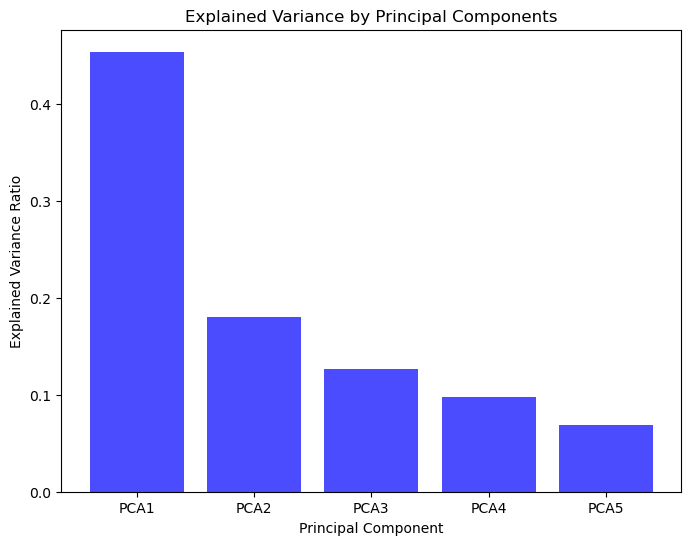

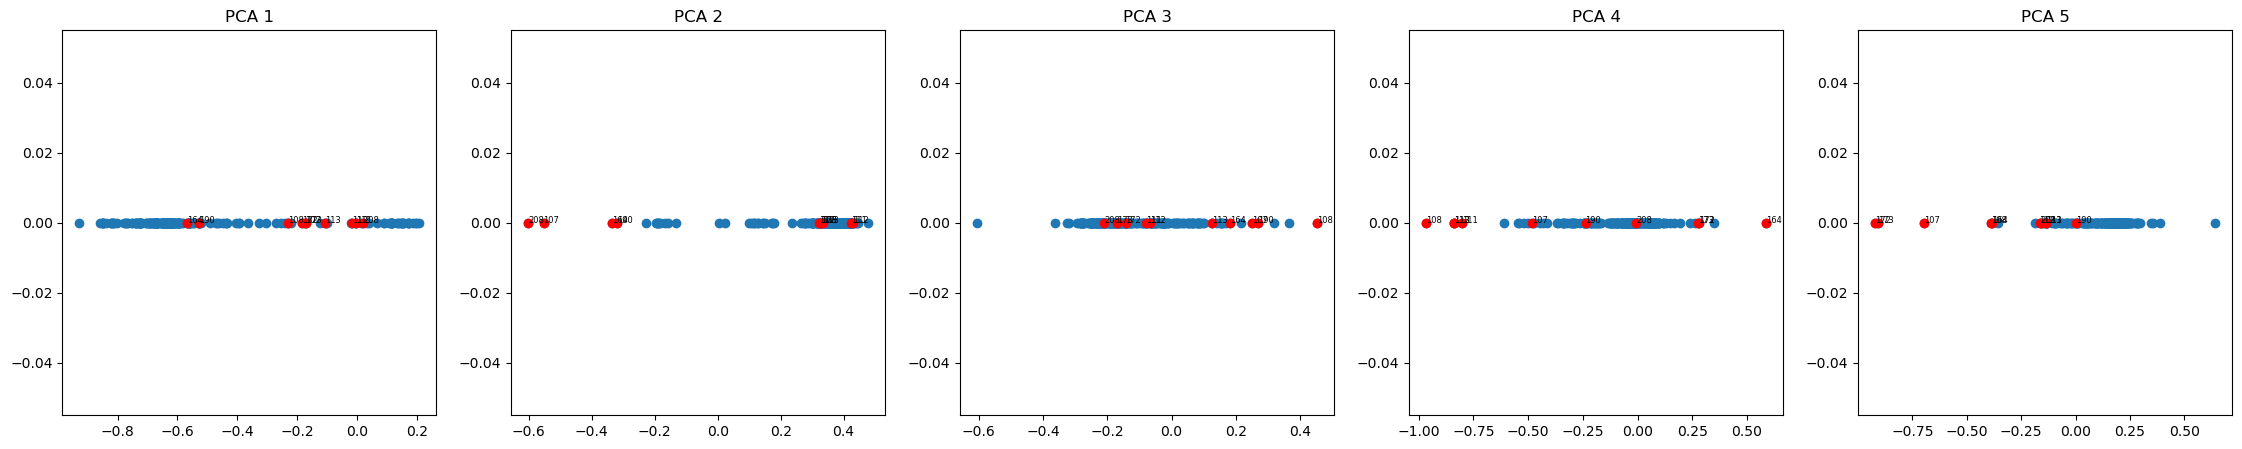

Suspected outliers are [107. 108. 111. 112. 113. 164. 172. 173. 190. 208.]


In [7]:
pca2 = PCA(n_components=n_pc)
pca2.fit(normalized_data[:,1:-1])
x_transformed_2 = pca.transform(normalized_data[:,1:-1])

pca2.plot_explained_variance()
avg = np.average(x_transformed_2,axis = 0)

std = np.std(x_transformed_2,axis = 0)

z_score = np.absolute(((x_transformed_2-avg)/std))
trueFalse = z_score >3.5

outlier = np.any(trueFalse, axis = 1)
fig, axes = plt.subplots(nrows = 1, ncols = n_pc, figsize = (28,5))
for n in range(n_pc):
        axes[n].set_title(f"PCA {n+1}")
        axes[n].scatter(x_transformed_2[:,n], np.zeros(len(x_transformed_2[:,n])))
        axes[n].scatter(x_transformed_2[outlier,n], np.zeros(len(x_transformed_2[outlier,n])), color = "r")
        for name, cord in zip(glass_data[outlier,0],x_transformed_2[outlier,n]):
            axes[n].annotate(str(int(name)),(cord, 0), size = 6 )
        
plt.show()

print(f'Suspected outliers are {glass_data[outlier,0]}')


# We are trying to test PCA on multivariate tests!

In [23]:
import time
from pyod.models.iforest import IForest

df_raw = pd.DataFrame(normalized_data[:,1:-1])
df_pca = pd.DataFrame(x_transformed_2)





In [24]:
clf = IForest()

clf.fit(df_raw)
outliers = clf.predict(df_raw)
df_raw['outliers'] = outliers
# Display outliers
outliers_df = df_raw[df_raw['outliers'] == 1]



In [25]:
clf2 = IForest()

clf2.fit(df_pca)
outliers2 = clf2.predict(df_pca)
df_pca['outliers'] = outliers2
# Display outliers
outliers_df2 = df_pca[df_pca['outliers'] == 1]



# Results

|Number | PCA-Given type | Raw PCA | Isolation forest woithout PCA | Isolation forest With PCA|
|:------|:--------------:|:-------:|:-----------------------------:|:------------------------:|
|1      |       1        |         |                               |                          |
|22     |       1        |         |                               |             1            |
|53     |       1        |         |                               |                          |
|55     |       1        |         |                               |                          |
|104    |       1        |         |               1               |             1            |    
|105    |                |         |                               |                          |    
|106    |                |         |               1               |             1            |    
|107    |       1        |     1   |               1               |             1            |    
|108    |       1        |     1   |               1               |             1            |    
|110    |       1        |         |               1               |             1            |    
|111    |                |     1   |               1               |             1            |    
|112    |                |     1   |               1               |             1            |    
|113    |                |     1   |               1               |             1            |    
|132    |                |         |               1               |             1            |    
|150    |       1        |         |                               |                          |    
|163    |       1        |         |                               |                          |    
|164    |                |     1   |               1               |             1            |    
|167    |                |         |                               |                          |    
|172    |                |     1   |               1               |             1            |    
|173    |                |     1   |               1               |             1            |    
|175    |                |         |               1               |                          |    
|176    |                |         |               1               |                          |    
|181    |                |         |               1               |                          |    
|184    |                |         |                               |             1            |    
|185    |                |         |               1               |             1            |    
|186    |                |         |               1               |             1            |    
|187    |                |         |               1               |             1            |    
|189    |                |         |               1               |             1            |    
|190    |                |     1   |               1               |             1            |    
|202    |       1        |         |               1               |             1            |    
|208    |                |     1   |               1               |             1            |    
|210    |                |         |                               |             1            |        


# PCA-Based Outlier Detection: Advantages & Disadvantages

| **Method** | **Advantages** | **Disadvantages** |
|------------|----------------|-------------------|
| **Univariate (Analyzing Individual PC Scores)** | - Simple and fast; easy to implement and understand.<br>- Detects outliers in specific PCs, especially minor ones where anomalies stand out.<br>- Great for visualization (e.g., scatter plots of PC1 vs. PC2). | - Misses outliers that depend on relationships between PCs.<br>- Checking multiple PCs can lead to false positives.<br>- Less effective if outliers align with high-variance PCs. |
| **Multivariate (Combining Multiple PC Scores)** | - Captures outliers by considering relationships between PCs, catching complex anomalies.<br>- Ideal for high-dimensional data with correlated features.<br>- Provides a holistic view of data in the PCA space. | - More computationally intensive than univariate.<br>- Sensitive to noisy or incomplete data, requiring careful preprocessing.<br>- Harder to visualize and interpret than univariate. |
| **Reconstruction Error** | - Intuitive: Outliers have large errors as they don’t fit the PCA model.<br>- Effective for high-dimensional data where PCA filters noise. | - Sensitive to the number of PCs chosen (*k*); wrong choice skews results.<br>- Requires careful threshold setting to avoid mislabeling.<br>- May produce high errors for normal points in sparse datasets. |

**Key Takeaway**: Use Univariate for quick, visual checks; Multivariate for complex, correlated data; Reconstruction Error for high-dimensional data with clear outliers.

# Multivariate Methods: Distance-Based vs Model-Based

## Distance-Based Methods
- **Definition**: Consider the joint distribution of variables.  
- **Examples**: Score distance (Hotelling’s T<sup>2</sup>, Mahalanobis distance D<sup>2</sup>).  
- **Notes**:
  - Raw correlations can distort distance measures, leading to unstable detection.  
  - Principal Component Analysis (PCA) reduces this effect by orthogonalizing components, improving stability.  
  - **Recommendation**: Use PCA before applying distance-based detection.  

## Model-Based Methods
- **Definition**: Learn patterns directly without covariance assumptions.  
- **Example**: Isolation Forest.  
- **Notes**:
  - Advanced models (e.g., Isolation Forest) already account for interactions between variables.  
  - Their detection performance changes little with PCA transformation.  
  - **Recommendation**: PCA is optional for model-based methods.est.  

# Conclusion

## Limitations of PCA for outlier detection

- **Linear assumption**: PCA only captures linear correlations; outliers in non-linear structures may remain hidden.  
- **Sensitivity to scaling and noise**: Without proper preprocessing, principal components may be distorted.  
- **Threshold choice**: Cut-offs (e.g., 98% quantile) are somewhat arbitrary and may vary across datasets.  


---


## Future directions
- **Robust PCA**: More resilient to noise and outliers during training, providing stable detection.  
- **Hybrid methods**: Combine PCA with clustering, kernel methods, or ensemble techniques to capture non-linear outliers.  
- **Better preprocessing**: Standardization, noise reduction, and feature engineering can improve detection quality.  